In [88]:
# Example 7.4
library(mnormt)
library(MASS)
data(CRSPday, package = "Ecdat")

In [89]:
dat = CRSPday[ , 4:7]

In [90]:
head(dat)

ge,ibm,mobil,crsp
-0.016760,0.000000,-0.002747,-0.007619
0.017045,0.005128,0.005510,0.013016
-0.002793,-0.002041,0.005479,0.002815
0.000000,-0.006135,0.002725,0.003064
0.000000,0.004115,0.005435,0.001633
-0.005602,-0.007172,0.008108,-0.001991


In [91]:
df = seq(5.25, 6.75, 0.01)
n = length(df)
loglik = rep(0,n)

In [98]:
for(i in 1:n)
{
    fit = cov.trob(dat, nu=df[i])
    loglik[i] = sum(log(dmt(dat, mean=fit$center, S=fit$cov, df=df[i])))
}

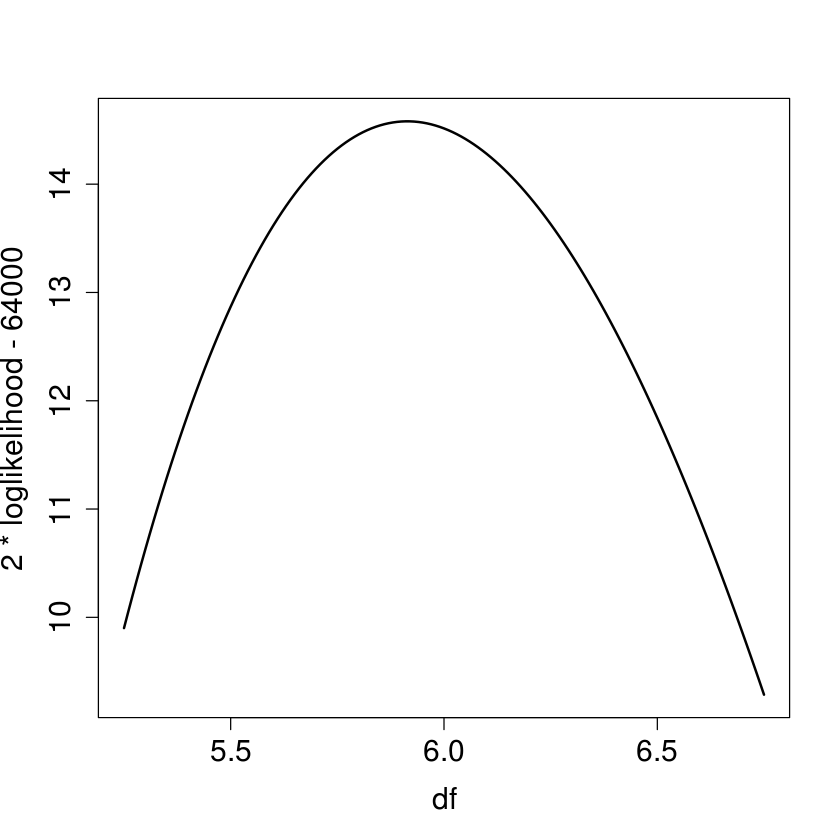

In [93]:
aic_t = -max(2 * loglik) + 2 * (4 + 10 + 1) + 64000
z1 = (2 * loglik > 2 * max(loglik) - qchisq(0.95, 1))
plot(df, 2 * loglik - 64000, type="l", cex.axis=1.5, cex.lab=1.5, ylab="2 * loglikelihood - 64000", lwd=2)

In [59]:
2 * max(loglik) - qchisq(0.95, 1) - 64000

[1] 10.73896

In [60]:
2 * max(loglik) - 64000

[1] 14.58042

In [61]:
(df[16] + df[17])/2

[1] 5.405

In [62]:
(df[130] + df[131])/2

[1] 6.545

In [94]:
which(z1 == TRUE)[1]

[1] 7

In [96]:
length(z1)

[1] 151

In [99]:
z1 = (2 * loglik > 2 * max(loglik) - qchisq(0.90, 1))

In [100]:
which(z1 == TRUE)[1]

[1] 16

In [16]:
llh = cov.trob(dat, nu=6, cor=TRUE)

In [17]:
llh

$cov
                ge          ibm        mobil         crsp
ge    1.257608e-04 4.838023e-05 3.432183e-05 4.598697e-05
ibm   4.838023e-05 1.827072e-04 2.303539e-05 3.848925e-05
mobil 3.432183e-05 2.303539e-05 1.157591e-04 2.804725e-05
crsp  4.598697e-05 3.848925e-05 2.804725e-05 3.674263e-05

$center
          ge          ibm        mobil         crsp 
0.0009423998 0.0004481150 0.0006883480 0.0007692719 

$n.obs
[1] 2528

$cor
             ge       ibm     mobil      crsp
ge    1.0000000 0.3191666 0.2844593 0.6765144
ibm   0.3191666 1.0000000 0.1583945 0.4697604
mobil 0.2844593 0.1583945 1.0000000 0.4300585
crsp  0.6765144 0.4697604 0.4300585 1.0000000

$call
cov.trob(x = dat, cor = TRUE, nu = 6)

$iter
[1] 3


In [24]:
# Example 7.5
library("sn")
data(CRSPday, package="Ecdat")
dat = CRSPday[ , 4:7]

In [25]:
fit = mst.mple(y=dat, penalty=NULL)
aic_skewt = -2 * fit$log + 64000 + 2 * (4 + 10 + 4 + 1)
dp2cp(fit$dp, "st")
aic_skewt

$beta
              ge          ibm        mobil         crsp
[1,] 0.001132934 0.0007146685 0.0007645859 0.0007341331

$var.cov
                ge          ibm        mobil         crsp
ge    1.891324e-04 7.286318e-05 5.142852e-05 6.893480e-05
ibm   7.286318e-05 2.747430e-04 3.444587e-05 5.755396e-05
mobil 5.142852e-05 3.444587e-05 1.741736e-04 4.203529e-05
crsp  6.893480e-05 5.755396e-05 4.203529e-05 5.517925e-05

$gamma1
         ge         ibm       mobil        crsp 
 0.16300788  0.17295648  0.06619816 -0.05690073 

$gamma2M
[1] 25.62034

[1] 5.499722

In [26]:
# 7.13 R lab

In [27]:
# 7.13.1 Equity returns
berndtInvest = read.csv("../datasets/datasets//berndtInvest.csv")
Berndt = as.matrix(berndtInvest[ , 2:5])
cov(Berndt)
cor(Berndt)

,CITCRP,CONED,CONTIL,DATGEN
CITCRP,0.006556442,0.0010933247,0.006052187,0.0055091027
CONED,0.001093325,0.0025272604,0.000795463,0.0006124665
CONTIL,0.006052187,0.0007954630,0.022710259,0.0050502504
DATGEN,0.005509103,0.0006124665,0.005050250,0.0162664367


,CITCRP,CONED,CONTIL,DATGEN
CITCRP,1.0000000,0.2685901,0.4959835,0.5334584
CONED,0.2685901,1.0000000,0.1049987,0.0955237
CONTIL,0.4959835,0.1049987,1.0000000,0.2627578
DATGEN,0.5334584,0.0955237,0.2627578,1.0000000


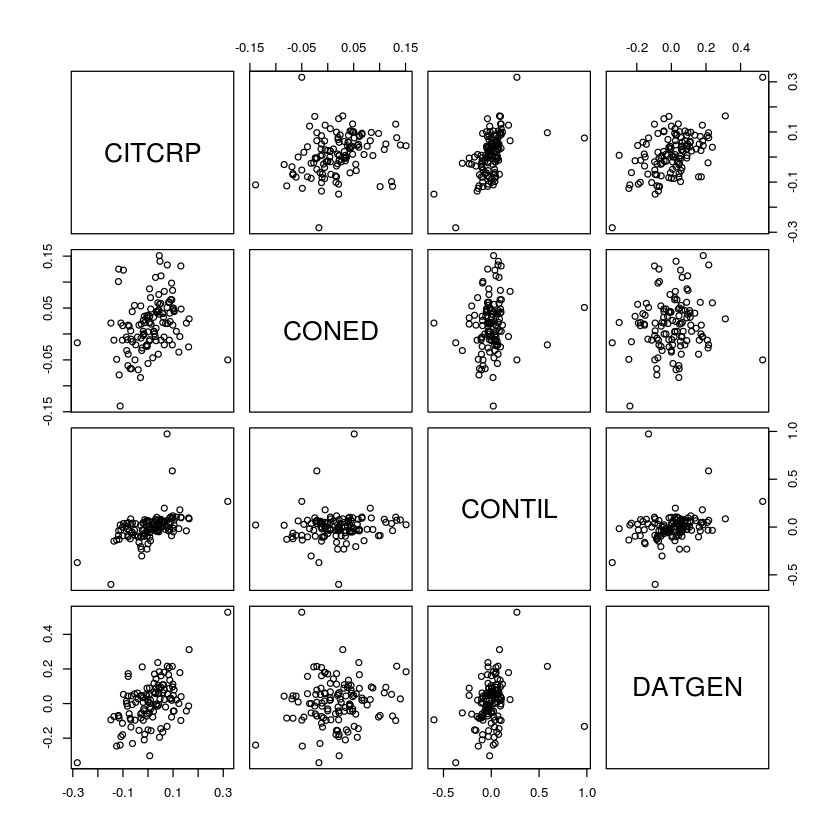

In [28]:
pairs(Berndt)

In [56]:
# Problem 1
w = c(0.5, 0.3, 0.2, 0)
t(w) %*% cov(Berndt) %*% w

0.004408865


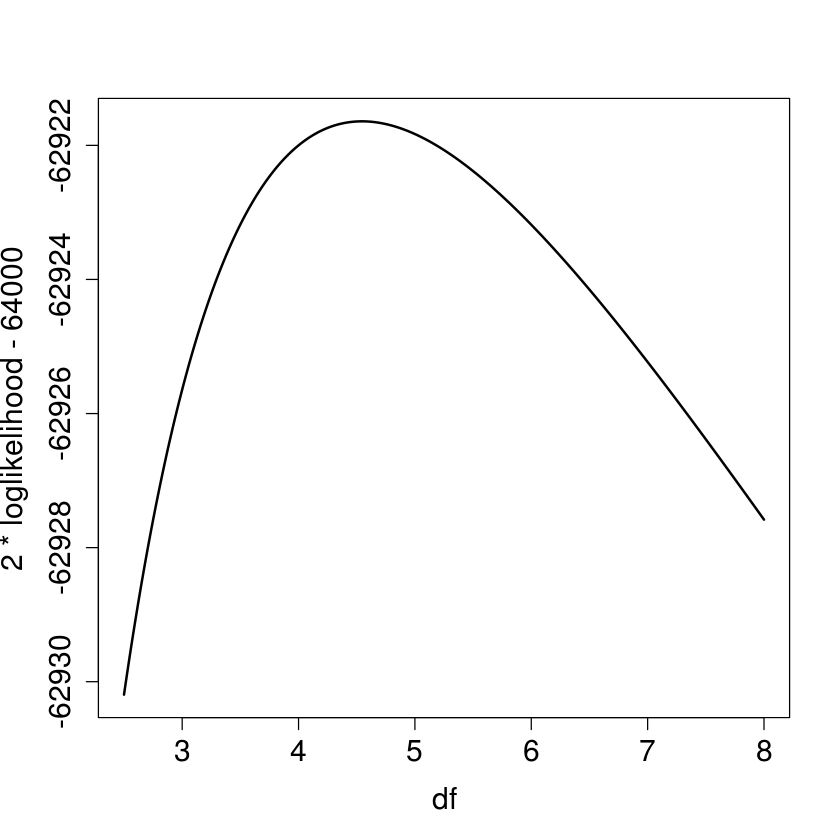

In [70]:
# Problem 2
library("MASS")
library("mnormt")
df = seq(2.5, 8, 0.01)
n = length(df)
loglike_profile = rep(0,n)
for(i in 1:n)
{
    fit = cov.trob(Berndt, nu = df[i])
    mu = as.vector(fit$center)
    sigma = matrix(fit$cov, nrow=4)
    loglike_profile[i] = sum(log(dmt(Berndt, mean=fit$center, S=fit$cov, df = df[i])))
}

aic_t = -max(2 * loglike_profile) + 2 * (4 + 10 + 1) + 64000
z1 = (2 * loglike_profile > 2 * max(loglike_profile) - qchisq(0.95, 1))
plot(df, 2 * loglike_profile - 64000, type="l", cex.axis=1.5, cex.lab=1.5, ylab="2 * loglikelihood - 64000", lwd=2)

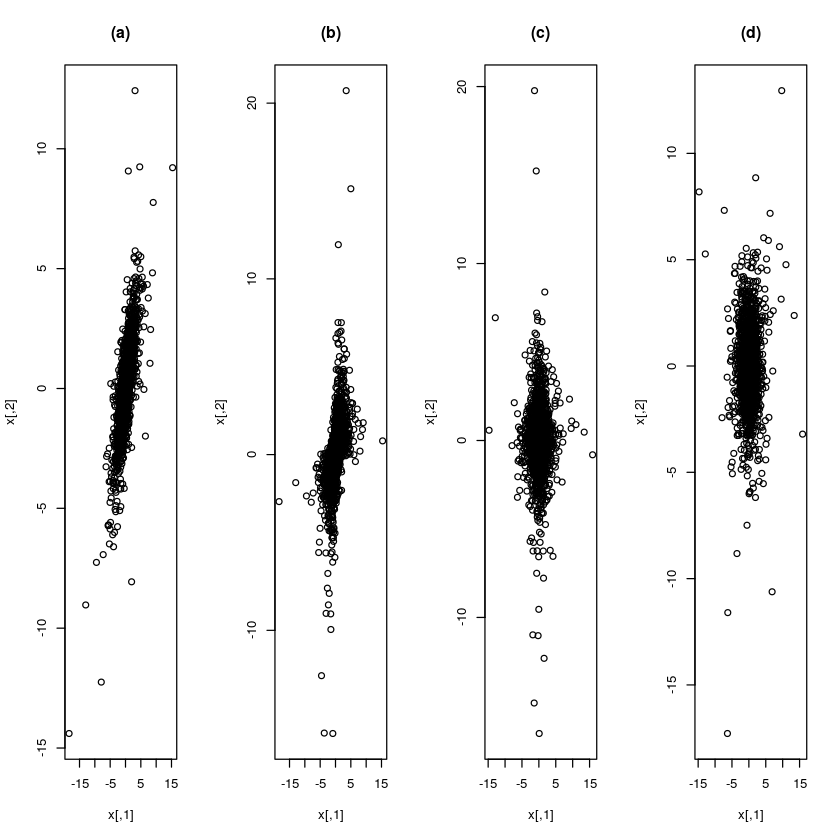

In [101]:
# 7.13.2
library(MASS)  # need for mvrnorm
par(mfrow=c(1,4))
N =  2500
nu = 3

set.seed(5640)
cov=matrix(c(1,.8,.8,1),nrow=2)
x= mvrnorm(N, mu = c(0,0), Sigma=cov)
w = sqrt(nu/rchisq(N, df=nu))
x = x * cbind(w,w)
plot(x,main="(a)")

set.seed(5640)
cov=matrix(c(1,.8,.8,1),nrow=2)
x= mvrnorm(N, mu = c(0,0), Sigma=cov)
w1 = sqrt(nu/rchisq(N, df=nu))
w2 = sqrt(nu/rchisq(N, df=nu))
x = x * cbind(w1,w2)
plot(x,main="(b)")

set.seed(5640)
cov=matrix(c(1,0,0,1),nrow=2)
x= mvrnorm(N, mu = c(0,0), Sigma=cov)
w1 = sqrt(nu/rchisq(N, df=nu))
w2 = sqrt(nu/rchisq(N, df=nu))
x = x * cbind(w1,w2)
plot(x,main="(c)")

set.seed(5640)
cov=matrix(c(1,0,0,1),nrow=2)
x= mvrnorm(N, mu = c(0,0), Sigma=cov)
w = sqrt(nu/rchisq(N, df=nu))
x = x * cbind(w,w)
plot(x,main="(d)")

In [102]:
# Problem 3
# Sample 3 and 4

In [103]:
# Problem 4
# Sample 2

In [104]:
# Problem 5
# Sample 1